In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [285]:
data1 = pd.read_csv('thyroid0387.data')

In [286]:
data1

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [287]:
features = ['age', 'sex', 'on thyroxine','query on thyroxine', 'on antithyroid medication',
'sick','pregnant','thyroid surgery','I131 treatment','query hypothyroid',
'query hyperthyroid','lithium',
'goitre','tumor','hypopituitary', 'psych', 'TSH measured', 'TSH','T3 measured','T3','TT4 measured','TT4',
'T4U measured','T4U','FTI measured','FTI','TBG measured','TBG','referral source', 'letter diagnosis']
			

In [288]:
len(features)

30

In [289]:
data1.columns = features

In [290]:
y = data1.iloc[:,-1]

In [347]:
X = data1.iloc[:,:-2]

In [348]:
y.head()

0    -[840801014]
1    -[840801042]
2    -[840803046]
3    S[840803047]
4    -[840803048]
Name: letter diagnosis, dtype: object

In [349]:
y_split= y.str.split('[')
y_split.head()

0    [-, 840801014]]
1    [-, 840801042]]
2    [-, 840803046]]
3    [S, 840803047]]
4    [-, 840803048]]
Name: letter diagnosis, dtype: object

In [350]:
y_split= y_split.apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
y_split

0       -
1       -
2       -
3       S
4       -
       ..
9166    -
9167    -
9168    I
9169    -
9170    -
Name: letter diagnosis, Length: 9171, dtype: object

In [351]:
Y = y_split

In [352]:
Y.describe()

count     9171
unique      32
top          -
freq      6770
Name: letter diagnosis, dtype: object

In [353]:
Y.unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [354]:
mapping_dict = {'f':0,'t':1,'F':0,'M':1,'?':None}
cat_data = []
num_data = ['age','TSH','T3','TT4','T4U','FTI','TBG']
for feature in X.columns:
    if feature not in num_data:
        cat_data.append(feature)

In [355]:
cat_data

['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'T3 measured',
 'TT4 measured',
 'T4U measured',
 'FTI measured',
 'TBG measured']

In [356]:
for x in X[cat_data]:
    X[x] = X[x].map(mapping_dict)
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG
0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.9,1.0,128,0.0,?,0.0,?,0.0,?
1,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,?,0.0,?,0.0,?,0.0,?,1.0,11
2,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,?,0.0,?,0.0,?,0.0,?,1.0,26
3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,?,0.0,?,0.0,?,0.0,?,1.0,36
4,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,?,0.0,?,0.0,?,0.0,?,1.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,?,1.0,64,1.0,0.83,1.0,77,0.0,?
9167,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,?,1.0,91,1.0,0.92,1.0,99,0.0,?
9168,69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,?,1.0,113,1.0,1.27,1.0,89,0.0,?
9169,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,?,1.0,75,1.0,0.85,1.0,88,0.0,?


In [357]:
X.replace('?', None, inplace=True)

In [358]:
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG
0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.9,1.0,128,0.0,None,0.0,None,0.0,None
1,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,None,0.0,None,0.0,None,0.0,None,1.0,11
2,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,None,0.0,None,0.0,None,0.0,None,1.0,26
3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,None,0.0,None,0.0,None,0.0,None,1.0,36
4,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,None,0.0,None,0.0,None,0.0,None,1.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,None,1.0,64,1.0,0.83,1.0,77,0.0,None
9167,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,None,1.0,91,1.0,0.92,1.0,99,0.0,None
9168,69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,None,1.0,113,1.0,1.27,1.0,89,0.0,None
9169,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,None,1.0,75,1.0,0.85,1.0,88,0.0,None


In [359]:
X.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2603
TT4 measured                    0
TT4                           441
T4U measured                    0
T4U                           808
FTI measured                    0
FTI                           801
TBG measured                    0
TBG                          8822
dtype: int64

In [360]:
X_good_features = X.drop(['TBG'],axis=1)

In [361]:
X_good_features = X_good_features.dropna(axis=0)
X_good_features.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
18,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.5,1.0,2.4,1.0,90,1.0,1.06,1.0,85,0.0
20,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,1.0,2.3,1.0,104,1.0,1.08,1.0,96,0.0
21,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.9,1.0,2.1,1.0,88,1.0,0.84,1.0,105,0.0
22,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,1.0,2.4,1.0,107,1.0,1.13,1.0,95,0.0
26,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,1.0,2.1,1.0,93,1.0,0.87,1.0,106,0.0


In [381]:
X_good_features[['TSH','T3','TT4','T4U','FTI','age']]=X_good_features[['TSH','T3','TT4','T4U','FTI','age']].astype(float)

In [382]:
X_good_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5789 entries, 18 to 9140
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        5789 non-null   float64
 1   sex                        5789 non-null   float64
 2   on thyroxine               5789 non-null   float64
 3   query on thyroxine         5789 non-null   float64
 4   on antithyroid medication  5789 non-null   float64
 5   sick                       5789 non-null   float64
 6   pregnant                   5789 non-null   float64
 7   thyroid surgery            5789 non-null   float64
 8   I131 treatment             5789 non-null   float64
 9   query hypothyroid          5789 non-null   float64
 10  query hyperthyroid         5789 non-null   float64
 11  lithium                    5789 non-null   float64
 12  goitre                     5789 non-null   float64
 13  tumor                      5789 non-null   float64
 

In [383]:
X_good_features.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
count,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,...,5789.000000,5789.0,5789.000000,5789.0,5789.000000,5789.0,5789.000000,5789.0,5789.000000,5789.000000
mean,76.291242,0.333391,0.121264,0.010364,0.016238,0.040076,0.012610,0.014856,0.019520,0.064605,...,5.162651,1.0,1.948817,1.0,107.878089,1.0,0.976116,1.0,112.130669,0.003455
std,1216.726999,0.471466,0.326463,0.101286,0.126399,0.196154,0.111594,0.120986,0.138355,0.245849,...,24.530112,0.0,0.872959,0.0,37.439111,0.0,0.193934,0.0,37.456203,0.058681
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,1.0,0.050000,1.0,2.000000,1.0,0.170000,1.0,1.400000,0.000000
25%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,1.0,1.500000,1.0,87.000000,1.0,0.860000,1.0,93.000000,0.000000
50%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.300000,1.0,1.900000,1.0,104.000000,1.0,0.960000,1.0,109.000000,0.000000
75%,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.600000,1.0,2.300000,1.0,125.000000,1.0,1.070000,1.0,127.000000,0.000000
max,65512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,1.0,18.000000,1.0,450.000000,1.0,2.330000,1.0,642.000000,1.000000


<Axes: xlabel='age', ylabel='Count'>

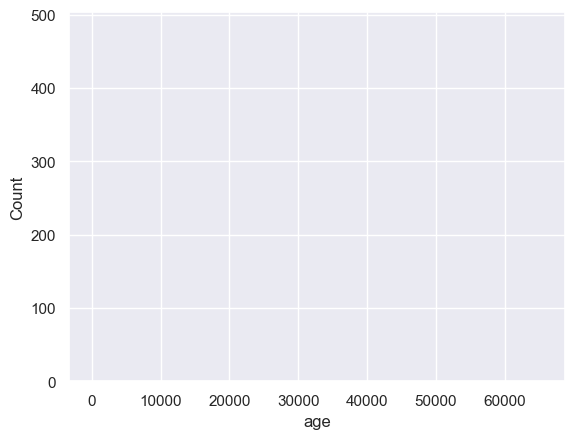

In [385]:
indices = X_good_features.index

In [388]:
y= Y[indices]

In [405]:
y.isnull().sum()

0

In [419]:
y.unique()

array(['-', 'AK', 'R', 'M', 'N', 'G', 'F', 'K', 'I', 'L', 'MK', 'A', 'Q',
       'J', 'C|I', 'O', 'H|K', 'GK', 'MI', 'KJ', 'P', 'FK', 'B', 'GI',
       'C', 'GKJ', 'OI', 'D'], dtype=object)

In [467]:
mapping_dict = {
    'A': 0, 'B': 0, 'C': 0, 'D': 0,  # hyperthyroid conditions
    'E': 1, 'F': 1, 'G': 1, 'H': 1,  # hypothyroid conditions
    'I': 2, 'J': 2,                   # binding protein
    'K': 3,                           # general health
    'L': 4, 'M': 4, 'N': 4,           # replacement therapy
    'R': 5,  'S':5,'T':5 ,                      # discordant results
    '-':6,                           #No condition requiring comments
    'AK':7,'C|I':7,'H|K':7,
    'FK':7, 'GI':7,'GKJ':7,'OI':7,
    'KJ':7,'MK':7, 'MI':7,
    'Q': 8,'O':8,'P':8,        #anti_thyroid threatments
}

In [468]:
y_mapped = y.map(mapping_dict)
y_mapped.info()

<class 'pandas.core.series.Series'>
Index: 5789 entries, 18 to 9140
Series name: letter diagnosis
Non-Null Count  Dtype  
--------------  -----  
5743 non-null   float64
dtypes: float64(1)
memory usage: 90.5 KB


In [469]:
y_mapped.isnull().sum()

46

In [470]:
y_mapped_no_na = y_mapped.dropna(axis = 0)

In [471]:
y_mapped_no_na.info()

<class 'pandas.core.series.Series'>
Index: 5743 entries, 18 to 9140
Series name: letter diagnosis
Non-Null Count  Dtype  
--------------  -----  
5743 non-null   float64
dtypes: float64(1)
memory usage: 89.7 KB


In [681]:
non_null_y_index = y_mapped_no_na.index
non_null_y_index

Index([  18,   20,   21,   22,   26,   27,   28,   29,   30,   31,
       ...
       9109, 9117, 9119, 9122, 9127, 9128, 9129, 9133, 9136, 9140],
      dtype='int64', length=5743)

In [473]:
X_corr_index = X_good_features.loc[non_null_y_index,:]

In [785]:
X_corr_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5743 entries, 18 to 9140
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        5743 non-null   float64
 1   sex                        5743 non-null   float64
 2   on thyroxine               5743 non-null   float64
 3   query on thyroxine         5743 non-null   float64
 4   on antithyroid medication  5743 non-null   float64
 5   sick                       5743 non-null   float64
 6   pregnant                   5743 non-null   float64
 7   thyroid surgery            5743 non-null   float64
 8   I131 treatment             5743 non-null   float64
 9   query hypothyroid          5743 non-null   float64
 10  query hyperthyroid         5743 non-null   float64
 11  lithium                    5743 non-null   float64
 12  goitre                     5743 non-null   float64
 13  tumor                      5743 non-null   float64
 

In [904]:
y_mapped.describe(include='all')

count    5743.000000
mean        5.134076
std         1.740014
min         0.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: letter diagnosis, dtype: float64

In [886]:
y_mapped_no_na.shape

(5743,)

Balancing the priors

In [932]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_corr_index, y_mapped_no_na)


In [933]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 198 to 8922
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        1607 non-null   float64
 1   sex                        1607 non-null   float64
 2   on thyroxine               1607 non-null   float64
 3   query on thyroxine         1607 non-null   float64
 4   on antithyroid medication  1607 non-null   float64
 5   sick                       1607 non-null   float64
 6   pregnant                   1607 non-null   float64
 7   thyroid surgery            1607 non-null   float64
 8   I131 treatment             1607 non-null   float64
 9   query hypothyroid          1607 non-null   float64
 10  query hyperthyroid         1607 non-null   float64
 11  lithium                    1607 non-null   float64
 12  goitre                     1607 non-null   float64
 13  tumor                      1607 non-null   float64


Train, validation, test split

In [934]:
from sklearn.model_selection import train_test_split

In [1044]:
Xtrain_v,Xtest, ytrain_v,ytest = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=52)

In [1045]:
X_train, X_val, y_train, y_val = train_test_split(Xtrain_v,ytrain_v, test_size=0.2,random_state=42)

Model

In [1046]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [1047]:
input_size = 60
hidden_layer_size = 100
output_size=9

In [1048]:
##One_hot_encoding_of_outputs

In [1049]:
X_train.shape

(1028, 27)

In [1050]:
y_train_encoded = tf.keras.utils.to_categorical(y_train,num_classes = output_size)
y_val_encoded = tf.keras.utils.to_categorical(y_val,num_classes = output_size)
y_test_encoded = tf.keras.utils.to_categorical(ytest, num_classes = output_size)

In [1051]:
model = tf.keras.Sequential([
    layers.Dense(input_size,input_shape=[Xtrain.shape[1]],activation='relu'),
    layers.Dense(hidden_layer_size, activation='relu'),
    layers.Dense(hidden_layer_size, activation='relu'),
    layers.Dense(hidden_layer_size, activation='relu'),
    layers.Dense(hidden_layer_size, activation='relu'),
    layers.Dense(output_size, activation='softmax')
])

Compiling the Model

In [1052]:
model.compile(optimizer ='adam',loss = 'huber',metrics = 'accuracy')

Fitting the model

In [1053]:
Batch_size = 30
no_epochs = 100

In [1054]:
from tensorflow.keras.callbacks import EarlyStopping

In [1058]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [1059]:
model.fit(
    X_train,y_train_encoded, epochs = no_epochs, batch_size = Batch_size,
          validation_data = (X_val,y_val_encoded), verbose=2, callbacks = [early_stopping]
         )

Epoch 1/100
35/35 - 0s - loss: 0.0138 - accuracy: 0.8395 - val_loss: 0.0168 - val_accuracy: 0.7743 - 388ms/epoch - 11ms/step
Epoch 2/100
35/35 - 0s - loss: 0.0164 - accuracy: 0.7879 - val_loss: 0.0168 - val_accuracy: 0.8016 - 228ms/epoch - 7ms/step
Epoch 3/100
35/35 - 0s - loss: 0.0138 - accuracy: 0.8307 - val_loss: 0.0161 - val_accuracy: 0.8054 - 242ms/epoch - 7ms/step
Epoch 4/100
35/35 - 0s - loss: 0.0142 - accuracy: 0.8220 - val_loss: 0.0143 - val_accuracy: 0.8444 - 214ms/epoch - 6ms/step
Epoch 5/100
35/35 - 0s - loss: 0.0134 - accuracy: 0.8395 - val_loss: 0.0138 - val_accuracy: 0.8366 - 218ms/epoch - 6ms/step
Epoch 6/100
35/35 - 0s - loss: 0.0140 - accuracy: 0.8161 - val_loss: 0.0140 - val_accuracy: 0.8210 - 205ms/epoch - 6ms/step
Epoch 7/100
35/35 - 0s - loss: 0.0157 - accuracy: 0.8103 - val_loss: 0.0157 - val_accuracy: 0.8132 - 230ms/epoch - 7ms/step
Epoch 8/100
35/35 - 0s - loss: 0.0162 - accuracy: 0.7967 - val_loss: 0.0184 - val_accuracy: 0.7588 - 198ms/epoch - 6ms/step
Epoch 9

Testing the model

In [1061]:
test_loss,test_accuracy = model.evaluate(Xtest, y_test_encoded)

11/11 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.8323


In [1062]:
test_loss,test_accuracy

(0.015994176268577576, 0.8322981595993042)